In [1]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import datetime
import matplotlib.pyplot as plt

In [24]:
import matplotlib.dates as mdates
from scipy import interpolate

In [7]:
data = pd.read_csv("20191214-1215.csv", skiprows=5)
data["timepoint"] = pd.to_datetime(data["time"])
#data = data[["timepoint", "RRI"]]
data

,time,RRI,temperature,Acc X,Acc Y,Acc Z,HF,LF/HF,LF ratio,activity,HR,timepoint
0,2019/12/14 10:59:23.000,923,18.6,0.00,0.00,0.00,0.000,0.000,0.000,-1.00,65,2019-12-14 10:59:23.000
1,2019/12/14 10:59:23.385,382,18.6,0.09,-0.87,0.78,0.000,0.000,0.000,0.18,157,2019-12-14 10:59:23.385
2,2019/12/14 10:59:26.588,3200,18.6,0.09,-0.87,0.78,0.000,0.000,0.000,0.18,19,2019-12-14 10:59:26.588
3,2019/12/14 10:59:29.791,3200,18.6,-0.16,-0.81,0.87,0.000,0.000,0.000,0.20,19,2019-12-14 10:59:29.791
4,2019/12/14 10:59:32.994,3200,18.6,-0.06,-0.75,0.72,0.000,0.000,0.000,0.04,19,2019-12-14 10:59:32.994
5,2019/12/14 10:59:34.300,1304,18.6,-0.06,-0.75,0.72,0.000,0.000,0.000,0.04,46,2019-12-14 10:59:34.300
6,2019/12/14 10:59:35.326,1023,18.6,-0.31,-0.91,1.00,0.000,0.000,0.000,0.39,59,2019-12-14 10:59:35.326
7,2019/12/14 10:59:37.738,2409,18.6,-0.31,-0.91,1.00,0.000,0.000,0.000,0.39,25,2019-12-14 10:59:37.738
8,2019/12/14 10:59:40.471,2730,18.6,-0.41,-0.84,1.84,0.000,0.000,0.000,1.07,22,2019-12-14 10:59:40.471
9,2019/12/14 10:59:41.190,716,18.6,-0.41,-0.84,1.84,0.000,0.000,0.000,1.07,84,2019-12-14 10:59:41.190


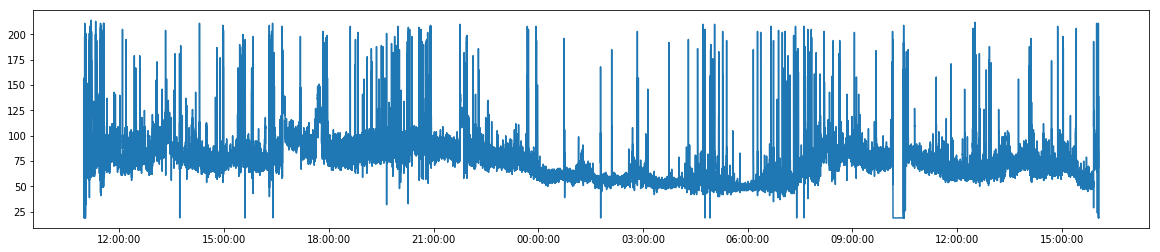

In [11]:
plt.figure(figsize=(20, 4))
plt.plot(data.timepoint, data.HR)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))

In [21]:
width_sec = 120
start1 = datetime.datetime(2019, 12, 15, 0, 30)
start2 = datetime.datetime(2019, 12, 15, 2, 30)

cond1 = (data.timepoint>=start1)&(data.timepoint<start1+datetime.timedelta(seconds=width_sec))
cond2 = (data.timepoint>=start2)&(data.timepoint<start2+datetime.timedelta(seconds=width_sec))

ext1 = data[cond1][["timepoint", "RRI"]]
ext1["elapsed_sec"] = (ext1.timepoint - ext1.timepoint.iloc[0]).dt.total_seconds()
ext2 = data[cond2][["timepoint", "RRI"]]
ext2["elapsed_sec"] = (ext2.timepoint - ext2.timepoint.iloc[0]).dt.total_seconds()

In [23]:
ext1.head()

,timepoint,RRI,elapsed_sec
69422,2019-12-15 00:30:00.118,986,0.000
69423,2019-12-15 00:30:01.182,1055,1.064
69424,2019-12-15 00:30:02.210,1019,2.092
69425,2019-12-15 00:30:03.202,983,3.084
69426,2019-12-15 00:30:04.204,993,4.086


In [ ]:
"""
カオス解析では、一般的に、時系列データの自己相関関数がゼロまたは最初に極小値を取る値から埋め込み遅延時間を求め、
Grassberger-Procaccia法により相関積分を計算し、それにより相関次元を求め、埋め込み次元を決定する
得られた埋め込み遅延時間、埋め込み次元にてTakensの埋め込み定理に従い、相空間への埋め込みを行い、最大リアプノフ指数を決定する

相関次元(規則的に振る舞っていれば非整数値)と最大リアプノフ指数(カオスであれば正の値)

"""

In [ ]:
"""
RRIなのかECGなのか
beat-to-beatデータのままで解析するのか、補間して等間隔データに補正してから用いるのか
"""

In [114]:
def spline1(data,window_sec=120, fr=4):
    """
    resampling fujiwara->1; guidline-> 1 or 2-5; other->4Hz, カレア->20Hz?
    """
    f = interpolate.interp1d(data.elapsed_sec.values, data.RRI.values,kind="cubic") 
    X = np.linspace(0,window_sec,num=window_sec*fr,endpoint=True)
    #内挿に留まるように、elapsed_sec以下までしかデータを得ない
    X = X[X<data.elapsed_sec.values[-1]]
    Y = f(X)
    return X,Y

#スプライン補間のリサンプリング周波数
fr = 4
re1_time, re1_RRI = spline1(ext1, fr=fr)
re2_time, re2_RRI = spline1(ext2, fr=fr)

In [115]:
import scipy.signal as sig
import copy

# dt:信号
# N:窓サイズ
# max_m:最大ずらすサンプル数

# 自己相関関数
def auto_correlate(dt):
    cor = sig.correlate(dt,dt,mode="full")
    return cor[cor.size/2:]

#https://qiita.com/hadacchi/items/ea61d6d714c5a7481461
# scipy.signal.correlate を sm.tsa.acf 風に
def sm_tsa_acf(x, nlags):
    nx = (x-x.mean())/x.std()
    sigcorr_buf = sig.correlate(nx,nx,mode='same')
    sigcorr = sigcorr_buf[len(sigcorr_buf)//2:]  # 正のlagのみ
    sigcorr /= len(sigcorr_buf)  # 定数で規格化

    # 代入
    sigcorr_acf = copy.copy(sigcorr[:nlags+1])
    return sigcorr_acf


In [116]:
re1_RRI.size

477

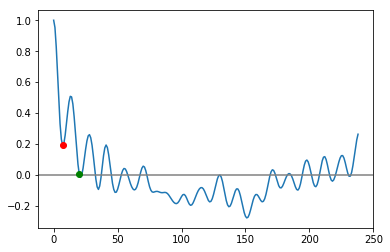

In [117]:
tmp = sm_tsa_acf(re1_RRI, nlags=re1_RRI.size)
plt.plot(tmp)
plt.axhline(0, color="gray")

#最初の極小値を検出
min_ids = sig.argrelmin(tmp)[0]
plt.plot(min_ids[0], tmp[min_ids[0]], color="r", marker="o")

#
th = 0.05
zero_id = np.argmax((tmp<th)&(tmp>-th))
plt.plot(zero_id, tmp[zero_id], color="g", marker="o")


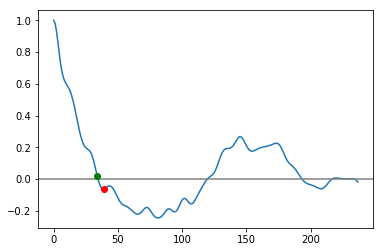

In [118]:
tmp = sm_tsa_acf(re2_RRI, nlags=re2_RRI.size)
plt.plot(tmp)
plt.axhline(0, color="gray")

#最初の極小値を検出
min_ids = sig.argrelmin(tmp)[0]
plt.plot(min_ids[0], tmp[min_ids[0]], color="r", marker="o")

#
th = 0.05
zero_id = np.argmax((tmp<th)&(tmp>-th))
plt.plot(zero_id, tmp[zero_id], color="g", marker="o")


In [119]:
"""
埋込遅延時間算出のために、自己相関関数から点を探索
"""

def find_first_zero_index(y, atol=0.05):
    #iscloseで初めにTrueを取るindexを返す
    return np.argmax(np.isclose(y, 0, atol=atol))

def find_first_argmin_index(y):
    #極小値のうち、最初の極小値のindexを返す
    min_ids = sig.argrelmin(y)[0]
    return min_ids[0]

In [120]:
fr

4

最初の極小値による埋込遅延時間[s] 9.75
最初のゼロによる埋込遅延時間[s] 8.5
カレアデフォルト設定の埋込遅延時間[s] 0.05


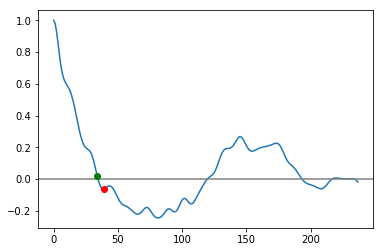

In [122]:
tmp = sm_tsa_acf(re2_RRI, nlags=re2_RRI.size)
plt.plot(tmp)
plt.axhline(0, color="gray")

#最初の極小値を検出
plt.plot(find_first_argmin_index(tmp), tmp[find_first_argmin_index(tmp)], color="r", marker="o")
print("最初の極小値による埋込遅延時間[s]", find_first_argmin_index(tmp)/fr)

#
plt.plot(find_first_zero_index(tmp), tmp[find_first_zero_index(tmp)], color="g", marker="o")
print("最初のゼロによる埋込遅延時間[s]", find_first_zero_index(tmp)/fr)


print("カレアデフォルト設定の埋込遅延時間[s]", 0.05)

最初の極小値による埋込遅延時間[s] 1.75
最初のゼロによる埋込遅延時間[s] 5.0
カレアデフォルト設定の埋込遅延時間[s] 0.05


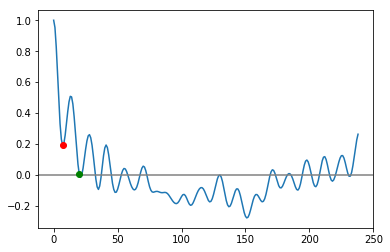

In [127]:
tmp = sm_tsa_acf(re1_RRI, nlags=re1_RRI.size)
plt.plot(tmp)
plt.axhline(0, color="gray")

#最初の極小値を検出
plt.plot(find_first_argmin_index(tmp), tmp[find_first_argmin_index(tmp)], color="r", marker="o")
print("最初の極小値による埋込遅延時間[s]", find_first_argmin_index(tmp)/fr)
argmin_id = find_first_argmin_index(tmp)

#
plt.plot(find_first_zero_index(tmp), tmp[find_first_zero_index(tmp)], color="g", marker="o")
print("最初のゼロによる埋込遅延時間[s]", find_first_zero_index(tmp)/fr)


print("カレアデフォルト設定の埋込遅延時間[s]", 0.05)

In [123]:
import nolds

In [139]:
import warnings

In [144]:
#nolds実装による埋込
def delay_embedding(data, emb_dim, lag=1):
    """
    Perform a time-delay embedding of a time series

    Args:
    data (array-like):
      the data that should be embedded
    emb_dim (int):
      the embedding dimension
    Kwargs:
    lag (int):
      the lag between elements in the embedded vectors

    Returns:
    emb_dim x m array:
      matrix of embedded vectors of the form
      [data[i], data[i+lag], data[i+2*lag], ... data[i+(emb_dim-1)*lag]]
      for i in 0 to m-1 (m = len(data)-(emb_dim-1)*lag)
    """
    data = np.asarray(data)
    min_len = (emb_dim - 1) * lag + 1
    if len(data) < min_len:
        msg = "cannot embed data of length {} with embedding dimension {} " \
            + "and lag {}, minimum required length is {}"
        raise ValueError(msg.format(len(data), emb_dim, lag, min_len))
    m = len(data) - min_len + 1
    indices = np.repeat([np.arange(emb_dim) * lag], m, axis=0)
    indices += np.arange(m).reshape((m, 1))
    return data[indices]

#nolds実装のユークリッド距離
def rowwise_euclidean(x, y):
    return np.sqrt(np.sum((x - y)**2, axis=1))

#要確認 相関次元計算のための超球半径しきい値算出
def logarithmic_r(min_n, max_n, factor):
    """
    Creates a list of values by successively multiplying a minimum value min_n by
    a factor > 1 until a maximum value max_n is reached.

    Args:
    min_n (float):
      minimum value (must be < max_n)
    max_n (float):
      maximum value (must be > min_n)
    factor (float):
      factor used to increase min_n (must be > 1)

    Returns:
    list of floats:
      min_n, min_n * factor, min_n * factor^2, ... min_n * factor^i < max_n
    """
    assert max_n > min_n
    assert factor > 1
    max_i = int(np.floor(np.log(1.0 * max_n / min_n) / np.log(factor)))
    return [min_n * (factor ** i) for i in range(max_i + 1)]


#
def poly_fit(x, y, degree, fit="RANSAC"):
    # check if we can use RANSAC
    if fit == "RANSAC":
        try:
            # ignore ImportWarnings in sklearn
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", ImportWarning)
                import sklearn.linear_model as sklin
                import sklearn.preprocessing as skpre
        except ImportError:
            warnings.warn(
              "fitting mode 'RANSAC' requires the package sklearn, using"
              + " 'poly' instead",
              RuntimeWarning)
            fit = "poly"

    if fit == "poly":
        return np.polyfit(x, y, degree)
    
    elif fit == "RANSAC":
        model = sklin.RANSACRegressor(sklin.LinearRegression(fit_intercept=False))
        xdat = np.asarray(x)
        if len(xdat.shape) == 1:
            # interpret 1d-array as list of len(x) samples instead of
            # one sample of length len(x)
            xdat = xdat.reshape(-1, 1)
        polydat = skpre.PolynomialFeatures(degree).fit_transform(xdat)
        try:
            model.fit(polydat, y)
            coef = model.estimator_.coef_[::-1]
        except ValueError:
            warnings.warn(
              "RANSAC did not reach consensus, "
              + "using numpy's polyfit",
              RuntimeWarning)
            coef = np.polyfit(x, y, degree)
        return coef
    
    else:
        raise ValueError("invalid fitting mode ({})".format(fit))
        
        
def plot_reg(xvals, yvals, poly, x_label="x", y_label="y", data_label="data",
             reg_label="regression line", fname=None):
    """
  Helper function to plot trend lines for line-fitting approaches. This
  function will show a plot through ``plt.show()`` and close it after the window
  has been closed by the user.

  Args:
    xvals (list/array of float):
      list of x-values
    yvals (list/array of float):
      list of y-values
    poly (list/array of float):
      polynomial parameters as accepted by ``np.polyval``
  Kwargs:
    x_label (str):
      label of the x-axis
    y_label (str):
      label of the y-axis
    data_label (str):
      label of the data
    reg_label(str):
      label of the regression line
    fname (str):
      file name (if not None, the plot will be saved to disc instead of
      showing it though ``plt.show()``)
    """
    # local import to avoid dependency for non-debug use
    import matplotlib.pyplot as plt
    plt.plot(xvals, yvals, "bo", label=data_label)
    if not (poly is None):
        plt.plot(xvals, np.polyval(poly, xvals), "r-", label=reg_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc="best")
    if fname is None:
        plt.show()
    else:
        plt.savefig(fname)
        plt.close()

In [137]:
#nolds実装の相関次元計算を基本に、埋込遅延時間を与えられるようにアップデート
def corr_dim_w_lag(data, emb_dim, rvals=None, dist=rowwise_euclidean, lag=1
             fit="RANSAC", debug_plot=False, debug_data=False, plot_file=None):
    """
  Calculates the correlation dimension with the Grassberger-Procaccia algorithm

  Explanation of correlation dimension:
    The correlation dimension is a characteristic measure that can be used
    to describe the geometry of chaotic attractors. It is defined using the
    correlation sum C(r) which is the fraction of pairs of points X_i in the
    phase space whose distance is smaller than r.

    If the relation between C(r) and r can be described by the power law

    C(r) ~ r^D

    then D is called the correlation dimension of the system.

    In a d-dimensional system, the maximum value for D is d. This value is
    obtained for systems that expand uniformly in each dimension with time.
    The lowest possible value is 0 for a system with constant C(r) (i.e. a
    system that visits just one point in the phase space). Generally if D is
    lower than d and the system has an attractor, this attractor is called
    "strange" and D is a measure of this "strangeness".

  Explanation of the algorithm:
    The Grassberger-Procaccia algorithm calculates C(r) for a range of
    different r and then fits a straight line into the plot of log(C(r))
    versus log(r).

    This version of the algorithm is created for one-dimensional (scalar) time
    series. Therefore, before calculating C(r), a delay embedding of the time
    series is performed to yield emb_dim dimensional vectors
    Y_i = [X_i, X_(i+1), X_(i+2), ... X_(i+embd_dim-1)]. Choosing a higher
    value for emb_dim allows to reconstruct higher dimensional dynamics and
    avoids "systematic errors due to corrections to scaling".

  References:
    .. [cd_1] P. Grassberger and I. Procaccia, “Characterization of strange
              attractors,” Physical review letters, vol. 50, no. 5, p. 346,
              1983.
    .. [cd_2] P. Grassberger and I. Procaccia, “Measuring the strangeness of
              strange attractors,” Physica D: Nonlinear Phenomena, vol. 9,
              no. 1, pp. 189–208, 1983.
    .. [cd_3] P. Grassberger, “Grassberger-Procaccia algorithm,”
              Scholarpedia, vol. 2, no. 5, p. 3043.
              urL: http://www.scholarpedia.org/article/Grassberger-Procaccia_algorithm

  Reference Code:
    .. [cd_a] "corrDim" function in R package "fractal",
              url: https://cran.r-project.org/web/packages/fractal/fractal.pdf
    .. [cd_b] Peng Yuehua, "Correlation dimension",
              url: http://de.mathworks.com/matlabcentral/fileexchange/24089-correlation-dimension

  Args:
    data (array-like of float):
      time series of data points
    emb_dim (int):
      embedding dimension
  Kwargs:
    [add]lag:
      埋込遅延時間tauのindex表記
    
    rvals (iterable of float):
      list of values for to use for r
      (default: logarithmic_r(0.1 * std, 0.5 * std, 1.03))
    dist (function (2d-array, 1d-array) -> 1d-array):
      row-wise difference function
    fit (str):
      the fitting method to use for the line fit, either 'poly' for normal
      least squares polynomial fitting or 'RANSAC' for RANSAC-fitting which
      is more robust to outliers
    debug_plot (boolean):
      if True, a simple plot of the final line-fitting step will be shown
    debug_data (boolean):
      if True, debugging data will be returned alongside the result
    plot_file (str):
      if debug_plot is True and plot_file is not None, the plot will be saved
      under the given file name instead of directly showing it through
      ``plt.show()``

  Returns:
    float:
      correlation dimension as slope of the line fitted to log(r) vs log(C(r))
    (1d-vector, 1d-vector, list):
      only present if debug_data is True: debug data of the form
      ``(rvals, csums, poly)`` where ``rvals`` are the values used for log(r), 
      ``csums`` are the corresponding log(C(r)) and ``poly`` are the line 
      coefficients (``[slope, intercept]``)
    """
    data = np.asarray(data)

    # TODO what are good values for r?
    # TODO do this for multiple values of emb_dim?
    if rvals is None:
        sd = np.std(data)
        rvals = logarithmic_r(0.1 * sd, 0.5 * sd, 1.03)
    n = len(data)
    orbit = delay_embedding(data, emb_dim, lag=lag)
    dists = np.array([dist(orbit, orbit[i]) for i in range(len(orbit))])
    csums = []
    for r in rvals:
        s = 1.0 / (n * (n - 1)) * np.sum(dists < r)
        csums.append(s)
    csums = np.array(csums)
    # filter zeros from csums
    nonzero = np.where(csums != 0)
    rvals = np.array(rvals)[nonzero]
    csums = csums[nonzero]
    if len(csums) == 0:
        # all sums are zero => we cannot fit a line
        poly = [np.nan, np.nan]
    else:
        poly = poly_fit(np.log(rvals), np.log(csums), 1)
    if debug_plot:
        plot_reg(np.log(rvals), np.log(csums), poly, "log(r)", "log(C(r))",
             fname=plot_file)
    if debug_data:
        return (poly[0], (np.log(rvals), np.log(csums), poly))
    else:
        return poly[0]

In [129]:
delay_embedding(tmp, emb_dim=4, lag=argmin_id).shape

(218, 4)

In [131]:
re1_RRI

array([ 986.        , 1017.92006054, 1039.06677947, 1050.93460207,
       1055.01797362, 1052.81133939, 1045.80914467, 1035.50583475,
       1023.39585489, 1010.95822195,  999.48089841,  990.12279326,
        984.04038876,  982.23560675,  984.05588865,  987.84516357,
        991.93328515,  994.77444215,  996.15211368,  996.65529107,
        996.88423312,  997.39461255,  998.23812973,  999.14802426,
        999.85252039, 1000.17060196, 1001.03934367, 1004.14826179,
       1011.20088723, 1023.7012459 , 1039.62926849, 1053.94694479,
       1061.51875394, 1057.25782851, 1040.08776851, 1015.87338893,
        991.17018879,  972.48173282,  963.58595994,  964.2464883 ,
        973.90508976,  991.9603021 , 1016.01296095, 1041.2586026 ,
       1062.7247712 , 1075.43931096, 1075.94954442, 1065.85556583,
       1047.80641261, 1024.45112217,  998.80047815,  975.58567508,
        960.04881044,  957.43038519,  970.03621314,  991.2046812 ,
       1012.56732702, 1025.75568824, 1024.58505701, 1012.74772

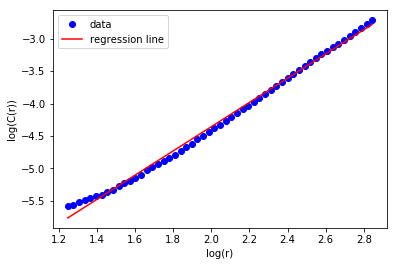

(1.872927926565426,
 (array([1.24727066, 1.27682947, 1.30638827, 1.33594707, 1.36550587,
         1.39506468, 1.42462348, 1.45418228, 1.48374108, 1.51329988,
         1.54285869, 1.57241749, 1.60197629, 1.63153509, 1.6610939 ,
         1.6906527 , 1.7202115 , 1.7497703 , 1.7793291 , 1.80888791,
         1.83844671, 1.86800551, 1.89756431, 1.92712312, 1.95668192,
         1.98624072, 2.01579952, 2.04535832, 2.07491713, 2.10447593,
         2.13403473, 2.16359353, 2.19315234, 2.22271114, 2.25226994,
         2.28182874, 2.31138755, 2.34094635, 2.37050515, 2.40006395,
         2.42962275, 2.45918156, 2.48874036, 2.51829916, 2.54785796,
         2.57741677, 2.60697557, 2.63653437, 2.66609317, 2.69565197,
         2.72521078, 2.75476958, 2.78432838, 2.81388718, 2.84344599]),
  array([-5.58300315, -5.56214492, -5.52389504, -5.4891844 , -5.46391989,
         -5.42918709, -5.40733915, -5.36126574, -5.32986889, -5.2819449 ,
         -5.23455871, -5.1924813 , -5.15210315, -5.10020121, -5.0331369

In [133]:
nolds.corr_dim(re1_RRI, emb_dim=4, rvals=None, debug_plot=True, debug_data=True, plot_file=None)

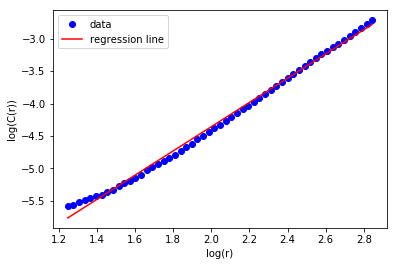

(1.872927926565426,
 (array([1.24727066, 1.27682947, 1.30638827, 1.33594707, 1.36550587,
         1.39506468, 1.42462348, 1.45418228, 1.48374108, 1.51329988,
         1.54285869, 1.57241749, 1.60197629, 1.63153509, 1.6610939 ,
         1.6906527 , 1.7202115 , 1.7497703 , 1.7793291 , 1.80888791,
         1.83844671, 1.86800551, 1.89756431, 1.92712312, 1.95668192,
         1.98624072, 2.01579952, 2.04535832, 2.07491713, 2.10447593,
         2.13403473, 2.16359353, 2.19315234, 2.22271114, 2.25226994,
         2.28182874, 2.31138755, 2.34094635, 2.37050515, 2.40006395,
         2.42962275, 2.45918156, 2.48874036, 2.51829916, 2.54785796,
         2.57741677, 2.60697557, 2.63653437, 2.66609317, 2.69565197,
         2.72521078, 2.75476958, 2.78432838, 2.81388718, 2.84344599]),
  array([-5.58300315, -5.56214492, -5.52389504, -5.4891844 , -5.46391989,
         -5.42918709, -5.40733915, -5.36126574, -5.32986889, -5.2819449 ,
         -5.23455871, -5.1924813 , -5.15210315, -5.10020121, -5.0331369

In [145]:
corr_dim_w_lag(re1_RRI, emb_dim=4, rvals=None, debug_plot=True, debug_data=True, plot_file=None)

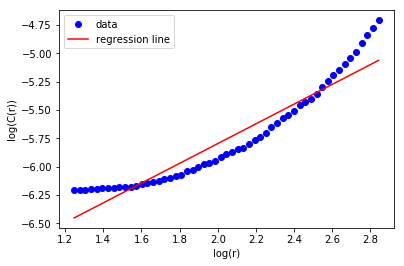

(0.8700942285115867,
 (array([1.24727066, 1.27682947, 1.30638827, 1.33594707, 1.36550587,
         1.39506468, 1.42462348, 1.45418228, 1.48374108, 1.51329988,
         1.54285869, 1.57241749, 1.60197629, 1.63153509, 1.6610939 ,
         1.6906527 , 1.7202115 , 1.7497703 , 1.7793291 , 1.80888791,
         1.83844671, 1.86800551, 1.89756431, 1.92712312, 1.95668192,
         1.98624072, 2.01579952, 2.04535832, 2.07491713, 2.10447593,
         2.13403473, 2.16359353, 2.19315234, 2.22271114, 2.25226994,
         2.28182874, 2.31138755, 2.34094635, 2.37050515, 2.40006395,
         2.42962275, 2.45918156, 2.48874036, 2.51829916, 2.54785796,
         2.57741677, 2.60697557, 2.63653437, 2.66609317, 2.69565197,
         2.72521078, 2.75476958, 2.78432838, 2.81388718, 2.84344599]),
  array([-6.20606516, -6.20606516, -6.20606516, -6.19736945, -6.19736945,
         -6.18874871, -6.18446605, -6.18446605, -6.18020165, -6.18020165,
         -6.17595536, -6.17172702, -6.15499023, -6.14261894, -6.130398

In [146]:
corr_dim_w_lag(re1_RRI, emb_dim=4, lag=argmin_id, rvals=None, debug_plot=True, debug_data=True, plot_file=None)

C:\Anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 119
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


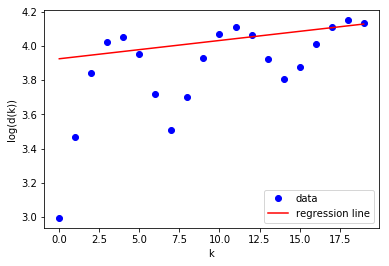

(0.04270276390656813,
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19]),
  array([2.99525523, 3.46647787, 3.84315896, 4.0206008 , 4.05157423,
         3.95348167, 3.71907997, 3.50653362, 3.69921756, 3.93097806,
         4.06789684, 4.11165237, 4.06322098, 3.92301297, 3.80800438,
         3.87902188, 4.0105381 , 4.10843325, 4.15000343, 4.13384724]),
  array([0.01067569, 3.92502074])))

In [147]:
nolds.lyap_r(re1_RRI, emb_dim=4, lag=argmin_id, min_tsep=None, tau=1/fr, 
             min_neighbors=20, trajectory_len=20, fit='RANSAC', 
             debug_plot=True, debug_data=True, plot_file=None, fit_offset=0)
#lag->delay_embeddingの遅延時間、tau->サンプリング間隔, 1/fr
#Estimates the largest Lyapunov exponent using the algorithm of Rosenstein et al.

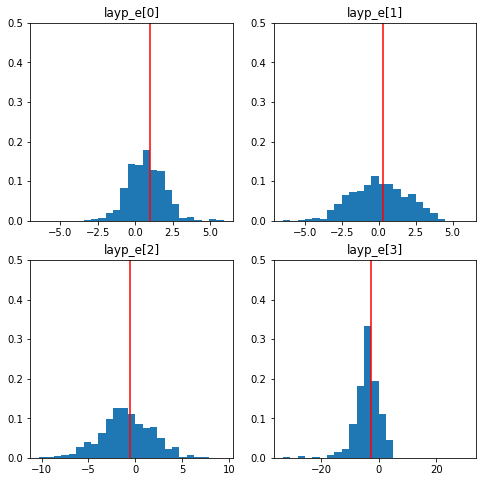

(array([ 0.9863365 ,  0.25918803, -0.5438375 , -2.6288164 ], dtype=float32),
 array([[-2.6730945e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 5.2957959e+00, -6.2492867e+00,  0.0000000e+00,  0.0000000e+00],
        [ 3.0463555e+00,  3.6931086e+00, -7.5128107e+00, -4.4408921e-16],
        ...,
        [ 2.6898175e-01, -3.6460125e+00,  2.3095968e+00, -2.2498014e+00],
        [-1.4914910e-01,  3.6912992e+00, -4.2199936e+00,  1.3905973e+00],
        [-8.7121075e-01,  2.9978757e+00, -3.2427597e+00,  1.8418179e+00]],
       dtype=float32))

In [156]:
nolds.lyap_e(re1_RRI, emb_dim=4, matrix_dim=4, 
             min_nb=None, min_tsep=0, tau=1/fr, debug_plot=True, debug_data=True, plot_file=None)

In [157]:
"""
http://www.chukai.ne.jp/~nburioka/newpage6.html
従来の報告の中には不等間隔の時系列データを補間処理して等間隔データに変換した上で埋め込み定理を用いてアトラクタを再構成し，
相関次元あるいはリアプノフ指数を計算した報告が多かった．補間処理そのもので複雑系システムのもとになる非線形的特徴の多くが
消失するため，補間データから得られた結果の妥当性はない．すなわち，循環器領域でよく用いられているRR間隔の解析は補間処理のみで
非線形的特徴の多くは消失する．従って補間処理した心拍変動から得られた相関次元は妥当性が少ないと思われる．

surrogate data
"""

477